In [1]:
!pip install scikit-optimize

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
from skopt import BayesSearchCV

In [3]:
import classifiers as classifiers
from classifiers import *

import feature_reduction as feature_reduction
from feature_reduction import *

import importlib
importlib.reload(classifiers)
importlib.reload(feature_reduction)

<module 'feature_reduction' from 'e:\\Grad_School\\Academics\\Semester 2\\Fundamentals of ML\\Homework\\HW 3\\feature_reduction.py'>

Generating Data based on specifications

In [4]:
np.random.seed(42)

mu_rest = [60, 10]
sigma_rest = [[20, 100], [100, 20]]

mu_stressed = [100, 80]
sigma_stressed = [[50, 20], [20, 50]]

num_samples = 1000

resting_samples = np.random.multivariate_normal(mu_rest, sigma_rest, num_samples)

stressed_samples = np.random.multivariate_normal(mu_stressed, sigma_stressed, num_samples)

print("Shape of resting samples array:", resting_samples.shape)
print("Shape of stressed samples array:", stressed_samples.shape)

Shape of resting samples array: (1000, 2)
Shape of stressed samples array: (1000, 2)


C:\Users\HP\AppData\Local\Temp\ipykernel_15440\2535208927.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  resting_samples = np.random.multivariate_normal(mu_rest, sigma_rest, num_samples)


Visualizing data distribution

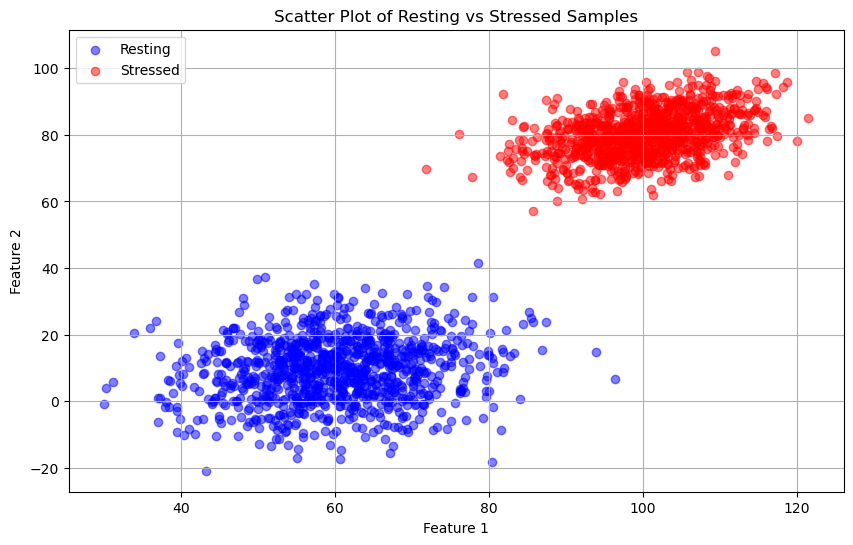

In [5]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(resting_samples[:, 0], resting_samples[:, 1], color='blue', alpha=0.5, label='Resting')
plt.scatter(stressed_samples[:, 0], stressed_samples[:, 1], color='red', alpha=0.5, label='Stressed')
plt.title('Scatter Plot of Resting vs Stressed Samples')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Fitting the classifier

In [6]:
#Stacking arrays together and preparing for k-means clustering
stacked_samples = np.row_stack((resting_samples, stressed_samples))
np.random.shuffle(stacked_samples)
# print(stacked_samples.shape)

num_clusters = 2
threshold = 0.01

k_means_classifier = KMeans_custom(stacked_samples)
list_centroids = k_means_classifier.fit(k=num_clusters, tol=threshold)

print(len(list_centroids))
print(list_centroids)

4
[[array([ 30.93011769, 105.28197863]), array([ 74.94041166, 105.28197863])], [array([47.36703599,  7.15459544]), array([84.36039972, 49.62455169])], [array([59.39830322,  8.72475048]), array([99.18553974, 77.94498368])], [array([60.10332798,  9.38255448]), array([100.07200444,  80.05598902])]]


Generating plots to visualize centroid shift in each iterations

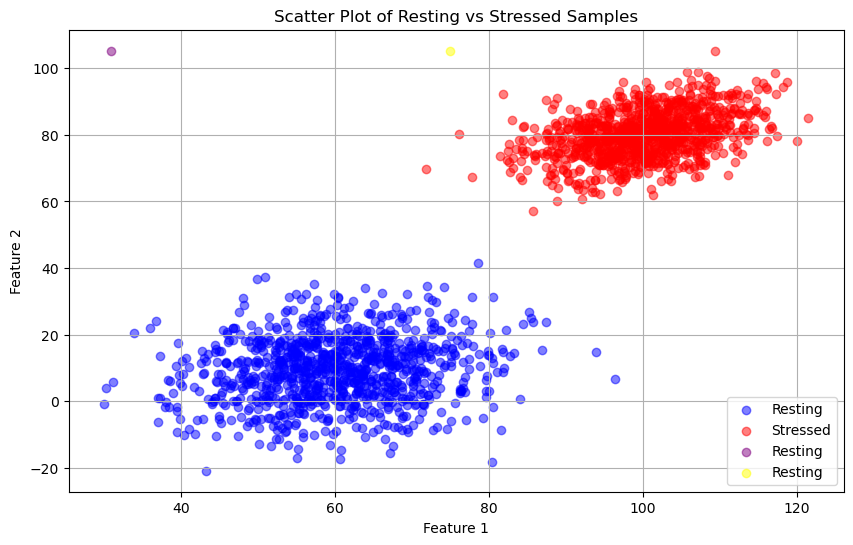

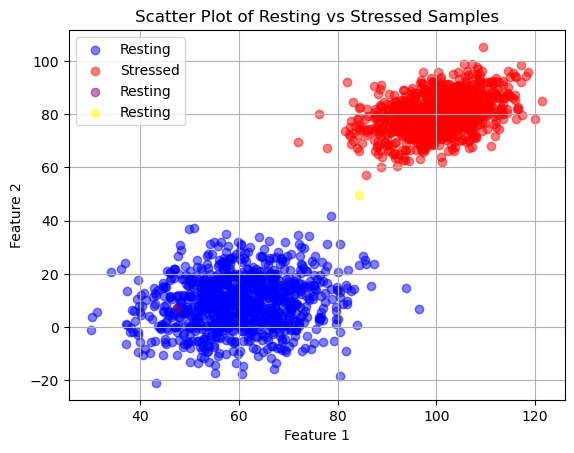

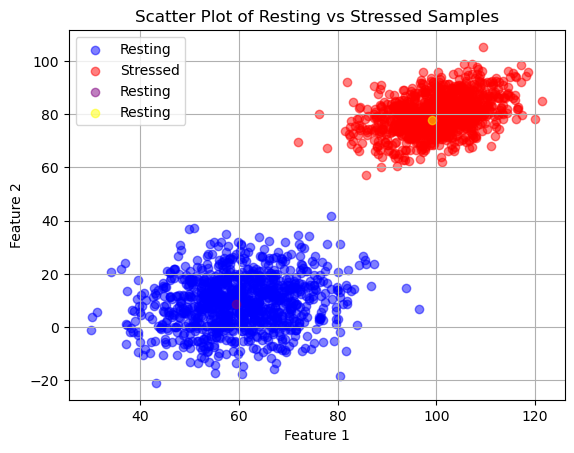

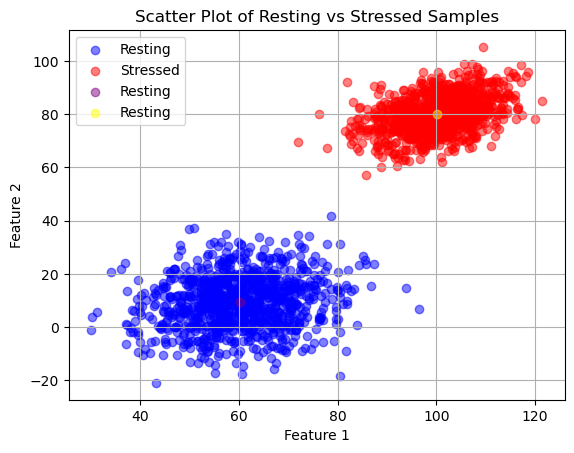

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'resting_samples' and 'stressed_samples' are updated in each iteration

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.title('Scatter Plot of Resting vs Stressed Samples')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Initialize plot objects for updating
plt.scatter(resting_samples[:, 0], resting_samples[:, 1], color='blue', alpha=0.5, label='Resting')
plt.scatter(stressed_samples[:, 0], stressed_samples[:, 1], color='red', alpha=0.5, label='Stressed')
plt.legend()

# Update the plot in each iteration
for i in range(len(list_centroids)):  # Replace 'num_iterations' with the actual number of iterations
    # Assuming 'resting_samples' and 'stressed_samples' are updated in each iteration
    # Get updated samples for each iteration

    # Clear previous plot
    plt.clf()

    # Update scatter plot with new coordinates
    plt.scatter(resting_samples[:, 0], resting_samples[:, 1], color='blue', alpha=0.5, label='Resting')
    plt.scatter(stressed_samples[:, 0], stressed_samples[:, 1], color='red', alpha=0.5, label='Stressed')
    plt.scatter(list_centroids[i][0][0], list_centroids[i][0][1], color='purple', alpha=0.5, label='Resting')
    plt.scatter(list_centroids[i][1][0], list_centroids[i][1][1], color='yellow', alpha=0.5, label='Resting')

    # Update title, labels, legend, and grid
    plt.title('Scatter Plot of Resting vs Stressed Samples for custom KMeans classifier')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)

    # Pause to update the plot
    plt.pause(0.5)  # Adjust the pause duration as needed


Using sklearn Kmeans

In [8]:
from sklearn.cluster import KMeans

# Apply sklearn's KMeans algorithm
sklearn_kmeans = KMeans(n_clusters = num_clusters, tol=threshold)
sklearn_kmeans.fit(stacked_samples)

sklearn_centroids = sklearn_kmeans.cluster_centers_
sklearn_labels = sklearn_kmeans.labels_
print("\nSklearn's KMeans centroids:")
print(sklearn_kmeans.cluster_centers_)
print("Sklearn's KMeans labels:")
print(sklearn_kmeans.labels_)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Sklearn's KMeans centroids:
[[ 60.10332798   9.38255448]
 [100.07200444  80.05598902]]
Sklearn's KMeans labels:
[1 0 0 ... 0 1 0]


Plotting sklearn's KMeans final estimation of centroids

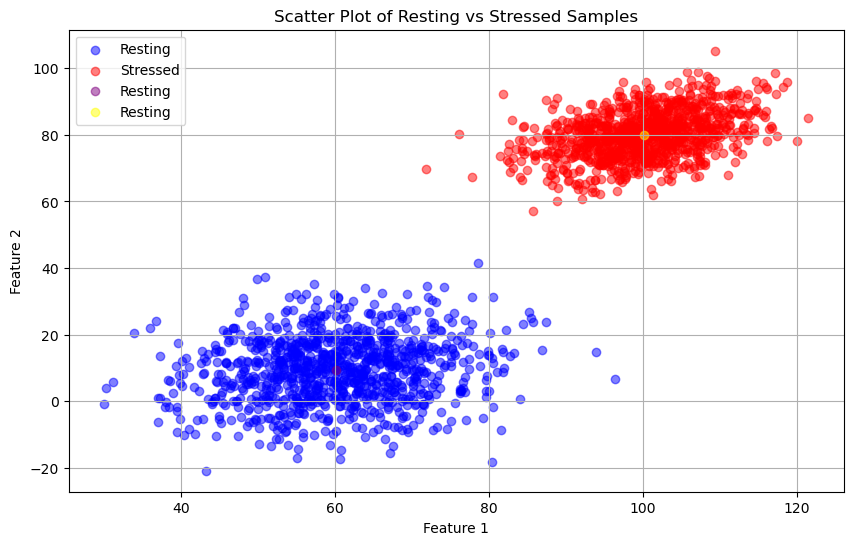

In [9]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(resting_samples[:, 0], resting_samples[:, 1], color='blue', alpha=0.5, label='Resting')
plt.scatter(stressed_samples[:, 0], stressed_samples[:, 1], color='red', alpha=0.5, label='Stressed')
plt.scatter(sklearn_centroids[0][0], sklearn_centroids[0][1], color='purple', alpha=0.5, label='Resting')
plt.scatter(sklearn_centroids[1][0], sklearn_centroids[1][1], color='yellow', alpha=0.5, label='Resting')
plt.title('Scatter Plot of Resting vs Stressed Samples for sklearn KMeans classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Using the predictin function to estimate the class and comparing it with sklearn's classifier

In [52]:
data_point = np.array([100.754, 47.324])

print("Custom Kmeans predicted class:", k_means_classifier.predict(x=data_point))

print("sklearn's kmeans classifier predicted class", sklearn_kmeans.predict([data_point]))

Custom Kmeans predicted class: 1
sklearn's kmeans classifier predicted class [1]


K-Means is not guaranteed to provide a unique solution every time. Since we assign a threshold and cut-off the iteration each time, the euclidian distance falls below the value, the value can vary always. Moreover, this randomness can be attributed to the random initialization of centroids in the initial stage, which powers the algorithms optimality. This can be observed in the number of iterations taken to arrive at the desired centroid value. In the method I have implemented, it varies between 3 and 4.

PCA

In [11]:
import feature_reduction as feature_reduction
from feature_reduction import *

import importlib
importlib.reload(feature_reduction)

<module 'feature_reduction' from 'e:\\Grad_School\\Academics\\Semester 2\\Fundamentals of ML\\Homework\\HW 3\\feature_reduction.py'>

Extracting the dataset

In [12]:
# Read the iris dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
iris_df = pd.read_csv(url, header=None, names=column_names)

# Drop NaN values
iris_df.dropna(inplace=True)

# Display the first few rows of the dataframe
print(iris_df.head())

   sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Printing the projection matrix

In [13]:
threshold_pca = 0.95

pca_classifier = PrincipleComponentAnalysis(iris_df)
projected_vectors = pca_classifier.fit(thresh=threshold_pca)

print(projected_vectors)

data_pandas = iris_df.iloc[:, :-1]
data = data_pandas.values

projection_matrix = pca_classifier.predict(data)

[[ 0.36158968 -0.65653988]
 [-0.08226889 -0.72971237]
 [ 0.85657211  0.1757674 ]
 [ 0.35884393  0.07470647]]


Printing the resulted projection of data

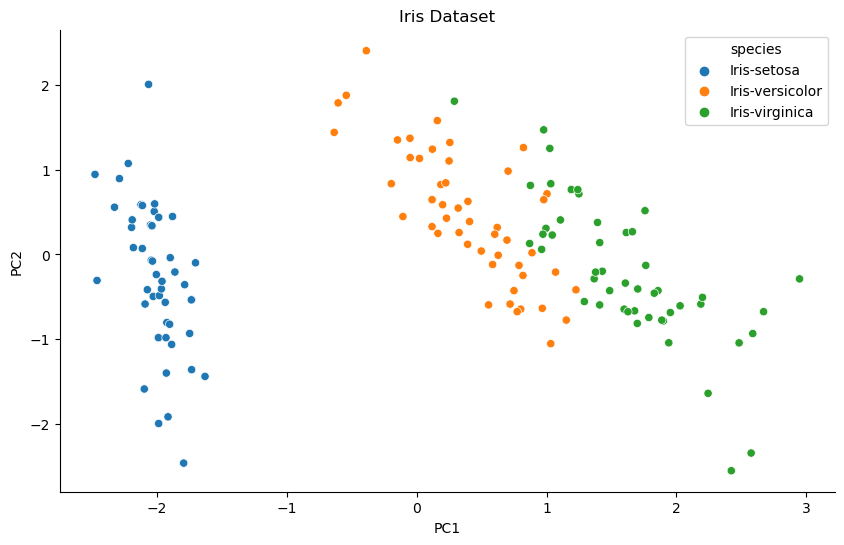

In [14]:
target_vector = iris_df.iloc[:, -1]

# plot results
fig, ax = plt.subplots(1, 1, figsize=(10,6))

sns.scatterplot(
    x = projection_matrix[:,0],
    y = projection_matrix[:,1],
    hue=target_vector
)

ax.set_title('Iris Dataset')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

sns.despine()

Comparing Projection matrices

In [15]:

X = iris_df.drop(columns=["species"])

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Testing against Sklearn's PCA
sklearn_pca = PCA(n_components=0.95)
X_sklearn_pca = sklearn_pca.fit_transform(X)

# Compare resulting projection matrix
print("\nComparison of Projection Matrices:")
print("Custom PCA Projection Matrix:")
print(projected_vectors)
print("\nSklearn's PCA Projection Matrix:")
print(pca.components_)


Comparison of Projection Matrices:
Custom PCA Projection Matrix:
[[ 0.36158968 -0.65653988]
 [-0.08226889 -0.72971237]
 [ 0.85657211  0.1757674 ]
 [ 0.35884393  0.07470647]]

Sklearn's PCA Projection Matrix:
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]


In PCA, the direction of the eigenvectors can be flipped without changing the interpretation of the principal components. This means that negating a principal component (i.e., flipping its sign) doesn't change its significance or the variance it captures.

With regards to the negative of the second vector, in comparison to sklearn's output, it is normal to have variations in directions of eigen vectors. As ultimately, PCA takes into account the standardized values, we will obtain the same projected values in the end

Pokemon Dataset

In [16]:
file_path = './pokemon_dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head()

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total,Legendary
0,Bulbasaur,NaN,GRASS,POISON,49,49,45,65,65,45,318,NaN
1,Ivysaur,NaN,GRASS,POISON,62,63,60,80,80,60,405,NaN
2,Venusaur,NaN,GRASS,POISON,82,83,80,100,100,80,525,NaN
3,Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625,NaN
4,Charmander,NaN,FIRE,NaN,52,43,39,60,50,65,309,NaN


Data Exploration

In [17]:
# Compute the number of unique classifications for each column
unique_classifications = df.nunique()

print("Number of unique classifications for each column:")
print(unique_classifications)

Number of unique classifications for each column:
Name              897
Name2             164
Primary Type       18
Secondary type     18
Attack            123
Defense           114
HP                103
Sp.Attack         119
Sp.Defense        107
Speed             127
Total             216
Legendary           1
dtype: int64


In [18]:
unique_categories_per_column = {}

columns_to_visualize = ['Primary Type', 'Secondary type']
# Iterate over each column in the DataFrame
for column in df.columns:
    if column in columns_to_visualize:
        unique_categories = df[column].unique()
    
        unique_categories_per_column[column] = unique_categories

print("Unique categories per column:")
for column, categories in unique_categories_per_column.items():
    print(f"{column}: {categories}")

Unique categories per column:
Primary Type: ['GRASS' 'FIRE' 'WATER' 'BUG' 'NORMAL' 'DARK' 'POISON' 'ELECTRIC' 'GROUND'
 'ICE' 'FAIRY' 'STEEL' 'FIGHTING' 'PSYCHIC' 'ROCK' 'GHOST' 'DRAGON'
 'FLYING']
Secondary type: ['POISON' nan 'FLYING' 'DRAGON' 'NORMAL' 'PSYCHIC' 'STEEL' 'GROUND'
 'FAIRY' 'GRASS' 'FIGHTING' 'ELECTRIC' 'ICE' 'DARK' 'GHOST' 'ROCK' 'WATER'
 'FIRE' 'BUG']


In [19]:
nan_columns = df.columns[df.isna().any()].tolist()

print(nan_columns)

['Name2', 'Secondary type', 'Legendary']


In [20]:
print("DATA EXPLORATION")
print('*'*70)
print("Shape of dataset : ",df.shape)
print('*'*70)
print(df.info())
print('*'*70)
print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
print('*'*70)
print(df.describe().T)
print('*'*70)
print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
print('*'*70)
print(df.describe(exclude = ['float', 'int64']).T)
print('*'*70)
print("MISSING VALUES")
print('*'*70)
print(df.isna().sum().sort_values(ascending=False))
print('*'*70)
print("MISSING VALUES IN %")
print('*'*70)
print(round(100* (df.isnull().sum() / len(df)).sort_values(ascending=False),2))
print('*'*70)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (1045, 12)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            1045 non-null   object
 1   Name2           175 non-null    object
 2   Primary Type    1045 non-null   object
 3   Secondary type  553 non-null    object
 4   Attack          1045 non-null   int64 
 5   Defense         1045 non-null   int64 
 6   HP              1045 non-null   int64 
 7   Sp.Attack       1045 non-null   int64 
 8   Sp.Defense      1045 non-null   int64 
 9   Speed           1045 non-null   int64 
 10  Total           1045 non-null   int64 
 11  Legendary       105 non-null    object
dtypes: int64(7), object(5)
memory usage: 98.1+ KB
None
*******************************

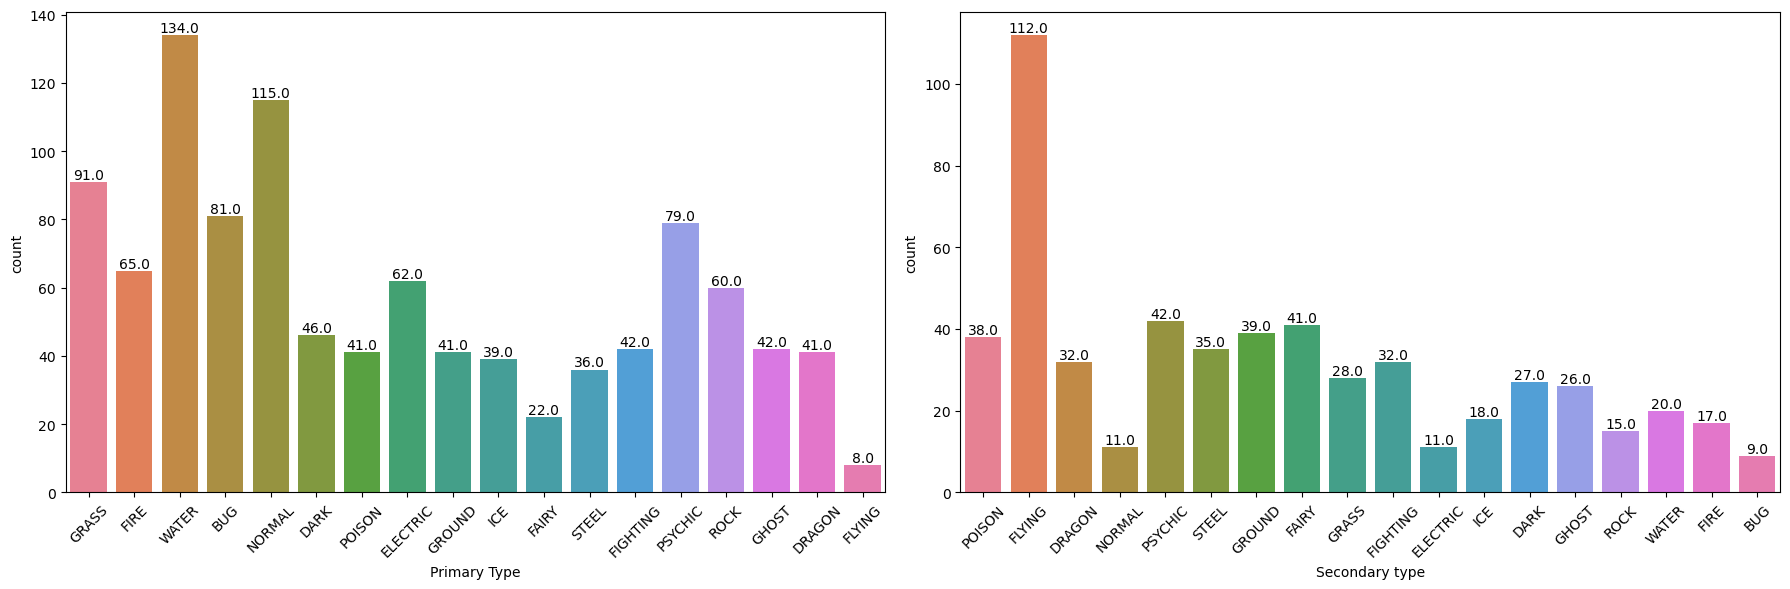

In [21]:
# Plotting the categorical variables on the target
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Display only two subplots

# Plot countplot for 'Primary Type' with annotations
sns.countplot(x='Primary Type', data=df, palette='husl', ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot countplot for 'Secondary type' with annotations
sns.countplot(x='Secondary type', data=df, palette='husl', ax=axes[1])
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add labels and show plot
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_15440\546164657.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

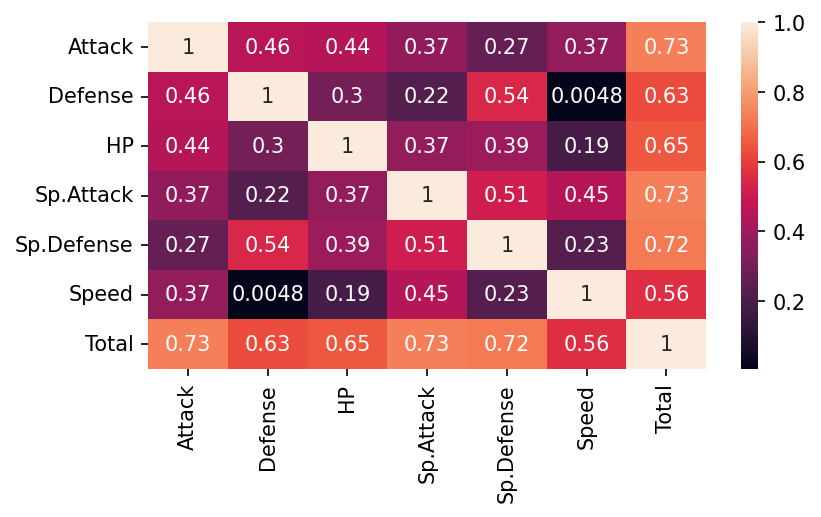

In [22]:
num_col = [feature for feature in df.columns if df[feature].dtypes != 'O']

plt.figure(figsize=(6,3), dpi=150)
sns.heatmap(df.corr(), annot=True)

In [23]:
print(df.dtypes)

Name              object
Name2             object
Primary Type      object
Secondary type    object
Attack             int64
Defense            int64
HP                 int64
Sp.Attack          int64
Sp.Defense         int64
Speed              int64
Total              int64
Legendary         object
dtype: object


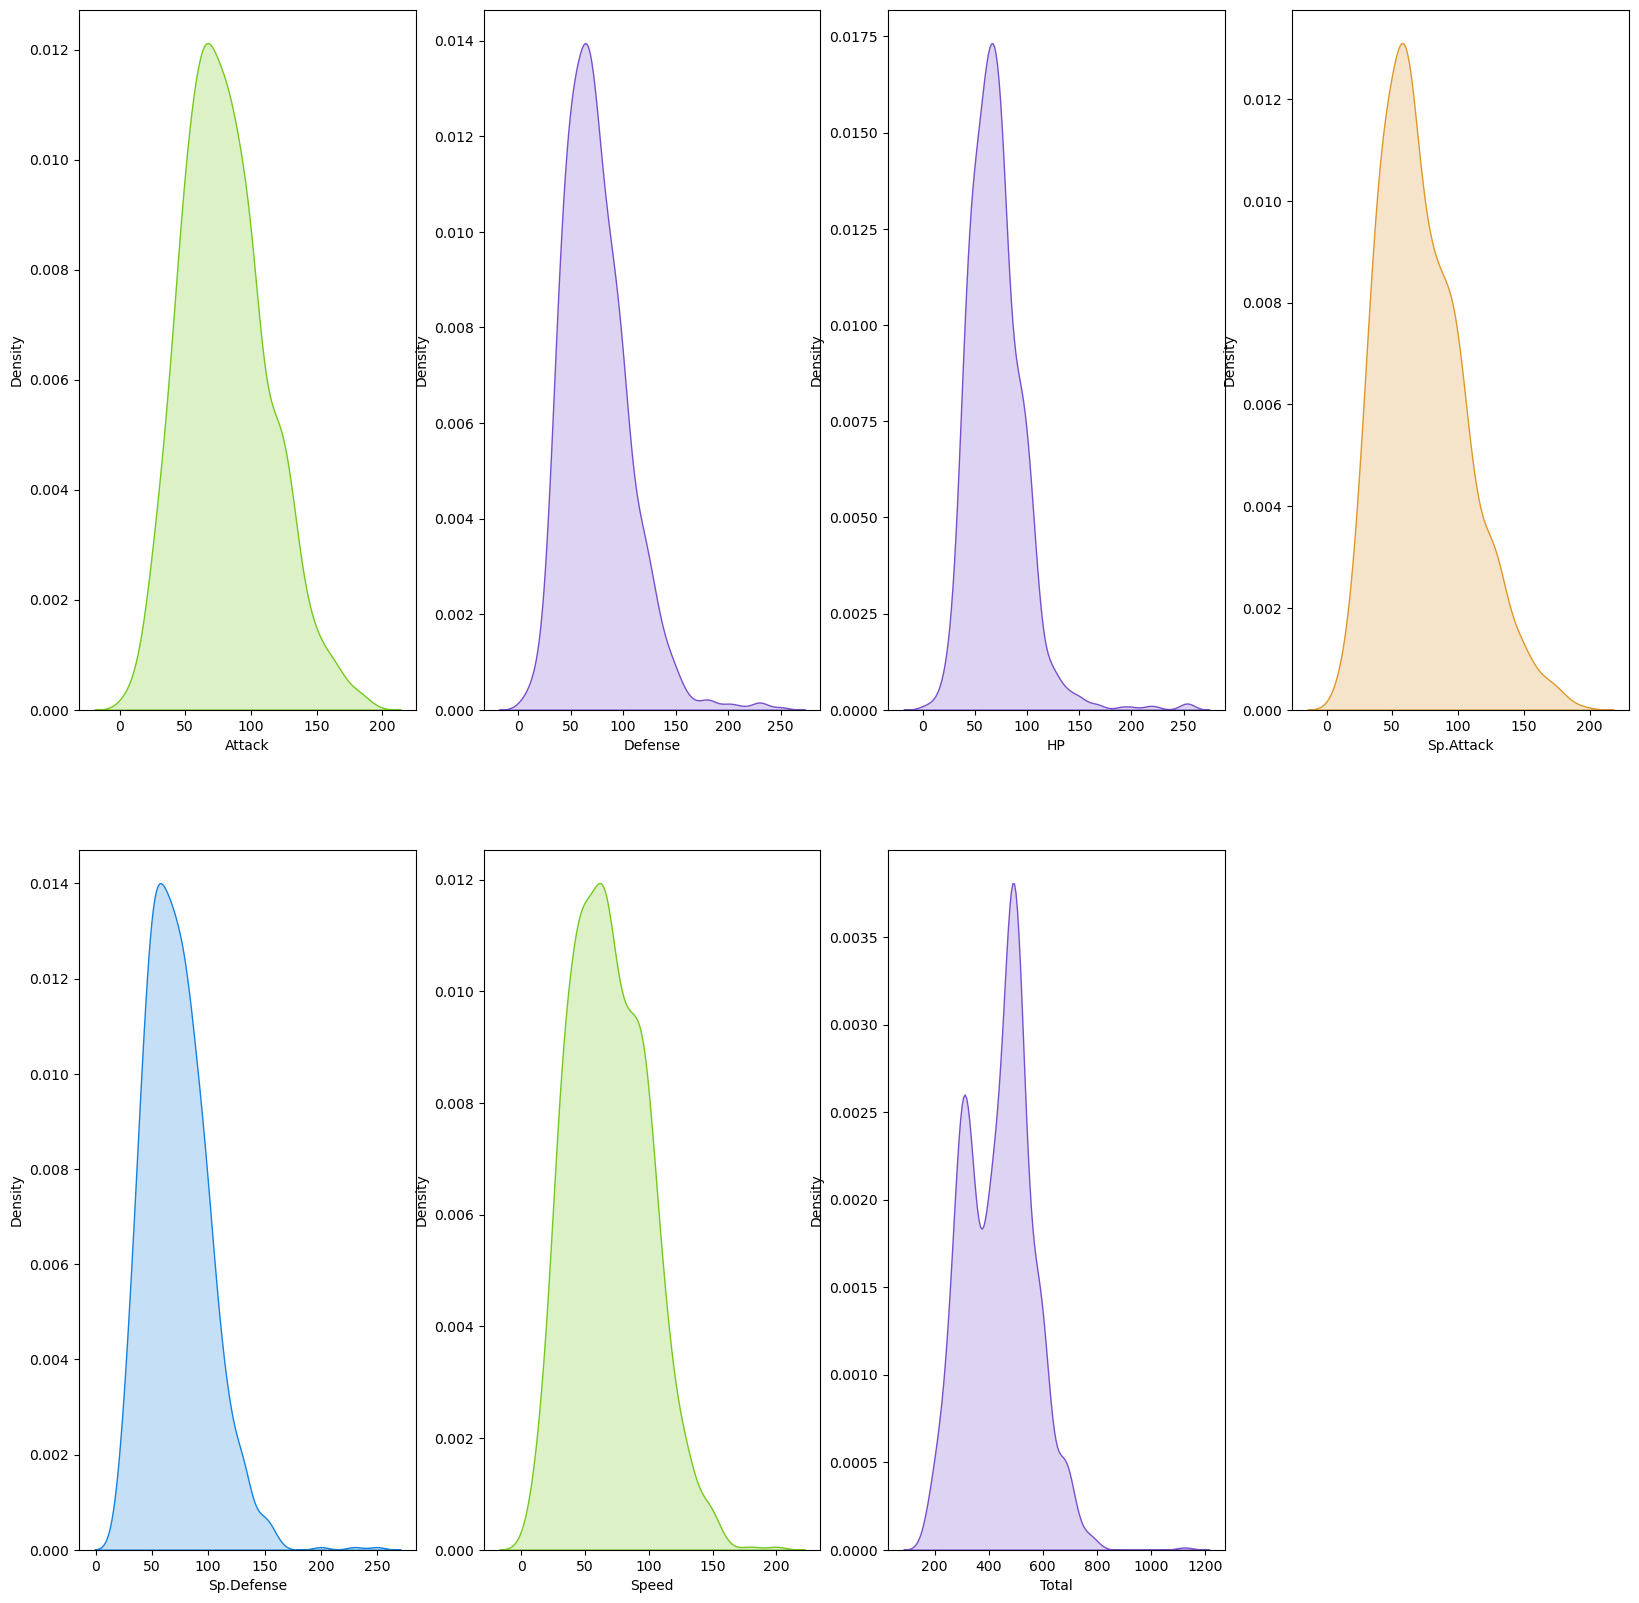

In [24]:
#Plotting the distributions of the numerical variables
color_plot = ['#de972c','#74c91e','#1681de','#e069f5','#f54545','#f0ea46','#7950cc', '#2F4538']

fig,ax = plt.subplots(2,4,figsize=(20,20))
# sns.kdeplot(df['Legendary'],color=np.random.choice(color_plot), ax=ax[0][0], fill=True)
sns.kdeplot(df['Attack'],color=np.random.choice(color_plot), ax=ax[0][0], fill=True)
sns.kdeplot(df['Defense'],color=np.random.choice(color_plot), ax=ax[0][1], fill=True)
sns.kdeplot(df['HP'],color=np.random.choice(color_plot), ax=ax[0][2], fill=True)
sns.kdeplot(df['Sp.Attack'],color=np.random.choice(color_plot), ax=ax[0][3],fill=True)
sns.kdeplot(df['Sp.Defense'],color=np.random.choice(color_plot), ax=ax[1][0], fill=True)
sns.kdeplot(df['Speed'],color=np.random.choice(color_plot), ax=ax[1][1],fill=True)
sns.kdeplot(df['Total'],color=np.random.choice(color_plot), ax=ax[1][2],fill=True)
fig.delaxes(ax[1][3])

Pre Processing

In [25]:
df_for_logistic = df

Using a Random Forest Predictor to fill in missing values of Secondary Type

Since SVM works bad with a multitude of features, I did not use one hot encoding for categorical features. I have done it here for the random forest classifier. I used frequency encoding for Primary Type and Secondary type

In [54]:
#One hot encoding of primary type for Random Forest

temp_primary_type  =df['Primary Type']
df_encoded = pd.get_dummies(df_for_logistic, columns=['Primary Type'], drop_first=False)
df_encoded = pd.concat([df_encoded, temp_primary_type], axis=1)
# df_encoded.drop(columns=['Name', 'Name2'], inplace=True)


df_encoded['Legendary'] = np.where(df_encoded['Legendary'] == 'Yes', 1, 0)


In [27]:
print(df_encoded.nunique())

Name                     897
Name2                    164
Secondary type            18
Attack                   123
Defense                  114
HP                       103
Sp.Attack                119
Sp.Defense               107
Speed                    127
Total                    216
Legendary                  2
Primary Type_BUG           2
Primary Type_DARK          2
Primary Type_DRAGON        2
Primary Type_ELECTRIC      2
Primary Type_FAIRY         2
Primary Type_FIGHTING      2
Primary Type_FIRE          2
Primary Type_FLYING        2
Primary Type_GHOST         2
Primary Type_GRASS         2
Primary Type_GROUND        2
Primary Type_ICE           2
Primary Type_NORMAL        2
Primary Type_POISON        2
Primary Type_PSYCHIC       2
Primary Type_ROCK          2
Primary Type_STEEL         2
Primary Type_WATER         2
Primary Type              18
dtype: int64


In [28]:
#Algorithmic Imputer for missing values - Random Forest

df_with_secondary = df_encoded[df_encoded['Secondary type'].notna()].reset_index(drop=True)
print("N. rows with Secondary type not null:", df_with_secondary.shape[0])

df_no_secondary = df_encoded[df_encoded['Secondary type'].isna()].reset_index(drop=True)
print("N. rows with Secondary type null:", df_no_secondary.shape[0])

N. rows with Secondary type not null: 553
N. rows with Secondary type null: 492


In [29]:
print(df_with_secondary)

          Name               Name2 Secondary type  Attack  Defense   HP  \
0    Bulbasaur                 NaN         POISON      49       49   45   
1      Ivysaur                 NaN         POISON      62       63   60   
2     Venusaur                 NaN         POISON      82       83   80   
3     Venusaur       Mega Venusaur         POISON     100      123   80   
4    Charizard                 NaN         FLYING      84       78   78   
..         ...                 ...            ...     ...      ...  ...   
548    Urshifu  Rapid Strike Style          WATER     130      100  100   
549     Zarude                 NaN          GRASS     120      105  105   
550    Calyrex                 NaN          GRASS      80       80  100   
551    Calyrex           Ice Rider            ICE     165      150  100   
552    Calyrex        Shadow Rider          GHOST      85       80  100   

     Sp.Attack  Sp.Defense  Speed  Total  ...  Primary Type_GRASS  \
0           65          65    

In [30]:
X = df_with_secondary.drop(["Secondary type", 'Primary Type', 'Name', 'Name2'], axis=1).values
Y = df_with_secondary["Secondary type"].values

Predicting missing classes in secondary type

In [31]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=False, 
                                max_features=0.6, min_samples_leaf=3, n_jobs=-1)

forest.fit(X, Y)

X_to_predict = df_no_secondary.drop(['Secondary type', 'Primary Type', 'Name', 'Name2'], axis=1).values

preds = forest.predict(X_to_predict)

df_no_secondary['Secondary type'] = preds

In [32]:
df_imputed = pd.concat([df_with_secondary, df_no_secondary], axis=0, ignore_index=True)

print(len(df_imputed))

one_hot_encoded_columns = [col for col in df_imputed.columns if col.startswith('Primary Type_')]

print(one_hot_encoded_columns)

1045
['Primary Type_BUG', 'Primary Type_DARK', 'Primary Type_DRAGON', 'Primary Type_ELECTRIC', 'Primary Type_FAIRY', 'Primary Type_FIGHTING', 'Primary Type_FIRE', 'Primary Type_FLYING', 'Primary Type_GHOST', 'Primary Type_GRASS', 'Primary Type_GROUND', 'Primary Type_ICE', 'Primary Type_NORMAL', 'Primary Type_POISON', 'Primary Type_PSYCHIC', 'Primary Type_ROCK', 'Primary Type_STEEL', 'Primary Type_WATER']


In [33]:
df_imputed.drop(one_hot_encoded_columns, axis=1, inplace=True)

In [34]:
print(df_imputed)

           Name          Name2 Secondary type  Attack  Defense   HP  \
0     Bulbasaur            NaN         POISON      49       49   45   
1       Ivysaur            NaN         POISON      62       63   60   
2      Venusaur            NaN         POISON      82       83   80   
3      Venusaur  Mega Venusaur         POISON     100      123   80   
4     Charizard            NaN         FLYING      84       78   78   
...         ...            ...            ...     ...      ...  ...   
1040      Kubfu            NaN         FLYING      90       60   60   
1041  Regieleki            NaN         FLYING     100       50   80   
1042  Regidrago            NaN         FLYING     100       50  200   
1043  Glastrier            NaN          STEEL     145      130  100   
1044  Spectrier            NaN         POISON      65       60  100   

      Sp.Attack  Sp.Defense  Speed  Total  Legendary Primary Type  
0            65          65     45    318          0        GRASS  
1          

In [35]:
# Calculate frequency of each category
frequency_map_primary = df_imputed['Primary Type'].value_counts(normalize=True)
frequency_map_secondary = df_imputed['Secondary type'].value_counts(normalize=True)
 
# Map the frequency values to the categories
df_imputed['Primary Type'] = df_imputed['Primary Type'].map(frequency_map_primary)
df_imputed['Secondary type'] = df_imputed['Secondary type'].map(frequency_map_secondary)

# df['Primary Type'] = df['primary_frequency_encoded']

print(df_imputed.head())

        Name          Name2  Secondary type  Attack  Defense  HP  Sp.Attack  \
0  Bulbasaur            NaN        0.074641      49       49  45         65   
1    Ivysaur            NaN        0.074641      62       63  60         80   
2   Venusaur            NaN        0.074641      82       83  80        100   
3   Venusaur  Mega Venusaur        0.074641     100      123  80        122   
4  Charizard            NaN        0.296651      84       78  78        109   

   Sp.Defense  Speed  Total  Legendary  Primary Type  
0          65     45    318          0      0.087081  
1          80     60    405          0      0.087081  
2         100     80    525          0      0.087081  
3         120     80    625          0      0.087081  
4          85    100    534          0      0.062201  


Standardizing

In [36]:
numerical_columns = [col for col in df.columns if col not in ['Name', 'Name2', 'Primary Type', 'Secondary type']]

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize numerical features
df_scaled = df_imputed.copy()  # Create a copy of the DataFrame to preserve the original data
# df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

print(df_scaled.head())


        Name          Name2  Secondary type  Attack  Defense  HP  Sp.Attack  \
0  Bulbasaur            NaN        0.074641      49       49  45         65   
1    Ivysaur            NaN        0.074641      62       63  60         80   
2   Venusaur            NaN        0.074641      82       83  80        100   
3   Venusaur  Mega Venusaur        0.074641     100      123  80        122   
4  Charizard            NaN        0.296651      84       78  78        109   

   Sp.Defense  Speed  Total  Legendary  Primary Type  
0          65     45    318          0      0.087081  
1          80     60    405          0      0.087081  
2         100     80    525          0      0.087081  
3         120     80    625          0      0.087081  
4          85    100    534          0      0.062201  


Fitting to a SVM classifier

In [55]:
X_svm = df_scaled.drop(['Name', 'Name2', 'Legendary'], axis=1).values  # Features
y_svm = df_scaled['Legendary'].values  # Target variable

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

pipeline = Pipeline([('std_scaler',StandardScaler()),])

X_train_svm_scaled = pipeline.fit_transform(X_train_svm)
X_test_svm_scaled = pipeline.transform(X_test_svm)

# Train the SVM classifier
svm_classifier = SVC()  # You can choose different kernels such as 'linear', 'rbf', etc.
svm_classifier.fit(X_train_svm_scaled, y_train_svm)

svm_classifier.get_params()

# y_pred = svm_classifier.predict(X_test_svm)

# accuracy = accuracy_score(y_test_svm, y_pred)
# print("Accuracy:", accuracy*100)

# print(classification_report(y_test_svm, y_pred))


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Resulting accuracy

In [38]:
y_pred_svc = svm_classifier.predict(X_test_svm_scaled)

print(accuracy_score(y_test_svm, y_pred_svc)*100, "%")
print()
print(classification_report(y_test_svm,y_pred_svc))

92.34449760765551 %

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       192
           1       0.54      0.41      0.47        17

    accuracy                           0.92       209
   macro avg       0.74      0.69      0.71       209
weighted avg       0.92      0.92      0.92       209



Hyperparameter Tuning

In [39]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train_svm_scaled, y_train_svm)

  

print(grid.best_params_) 
print() 
print(grid.best_estimator_) 
print()

grid_predictions = grid.predict(X_test_svm) 
  
print(classification_report(y_test_svm, grid_predictions)) 


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.898 total time=   0.0s


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.898 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.911 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.928 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.928 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.916 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.928 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.898 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.898 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.911 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV for this problem did not work aptly, since it reduced the F1 score of the False class rapidly

Hence concluding that with the adequate pre-processing, Grid Search CV's hyperparameter tuning did not work

Proceeding to Bayesian Optimization - tried implementing it, but unfortunately the package skopt seems to be deprecated because of np.int functionality. Could not use this.

However, with the imbalanced classes, the model tended to work well with SVM and hyperparameter tuning was not necessary

The code I used for Bayesian Search can be found below. I have commented it out to avoid unnecessary running conflicts

In [ ]:
# param_space_bayesian =     {
#         'C': (1e-6, 1e+6, 'log-uniform'),
#         'gamma': (1e-6, 1e+1, 'log-uniform'),
#         'degree': (1, 8),  # integer valued parameter
#         'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
#     }

# X_svm_bayesian = df_scaled.drop(['Name', 'Name2', 'Legendary'], axis=1)  # Features
# y_svm_bayesian = df_scaled['Legendary']  # Target variable

# print(type(X_svm_bayesian))

# X_train_svm_bayesian, X_test_svm_bayesian, y_train_svm_bayesian, y_test_svm_bayesian = train_test_split(X_svm_bayesian, y_svm_bayesian, test_size=0.2, random_state=42)

# pipeline = Pipeline([('std_scaler',StandardScaler()),])

# X_train_svm_scaled_bayesian = pipeline.fit_transform(X_train_svm_bayesian)
# X_train_svm_scaled_bayesian_df = pd.DataFrame(X_train_svm_scaled_bayesian, columns=X_train_svm_bayesian.columns)

# X_test_svm_scaled_bayesian = pipeline.transform(X_test_svm_bayesian)
# X_test_svm_scaled_bayesian_df = pd.DataFrame(X_test_svm_scaled_bayesian, columns=X_test_svm_bayesian.columns)

# print(X_train_svm_scaled_bayesian)

# # Perform Bayesian Optimization for hyperparameter tuning
# opt = BayesSearchCV(
#     SVC(),
#     param_space_bayesian,
#     n_iter=32,  # Number of parameter settings that are sampled
#     cv=3,  # Number of cross-validation folds
#     scoring='accuracy',
#     random_state=42
# )

# # Fit the optimizer to the data
# opt.fit(X_train_svm_scaled_bayesian_df, y_train_svm_bayesian)

# # Get the best hyperparameters
# best_params = opt.best_params_
# print("Best Hyperparameters:", best_params)

# # Evaluate the model on the test set
# bayesian_classifier = opt.best_estimator_
# bayesian_predictions = bayesian_classifier.predict(X_test_svm_scaled_bayesian)
# test_accuracy = accuracy_score(y_test_svm_bayesian, bayesian_predictions)
# print("Test Accuracy:", test_accuracy)

# print(classification_report(y_test_svm_bayesian, bayesian_predictions)) 